---
### Projectr : 하루시작 지하철 혼잡도 머신러닝 
### Description : 
    
### Author : Forrest Dpark
### Date : 2024.06.04+ ~
### Detail : 
### Update: 
    - 2024.06.04 by pdg : 머신러닝을 위한 데이터 셋 만들기 
        * 일부 정제용 함수 수정 
        * 칼럼 순서를 재벼열하는 함수를 만듬. 
        * 7호선 만  지하철 배차 정보 있는 상태 -> 승하차 데이터에서 7호선만 추출 
        * 배차 날짜별 분포 시각화
        * 승하차 데이터에서 날짜 정보  정제
    - 2024.06.05 by pdg, snr, pjh pair coding : 정제 완료된 최종 데이터 셋으로 모델학습
        * 모델 학습을 위해 승하차로 나누누어 데이터 저장 
        * 승차 -> mlTable_승차.csv, 하차 -> mlTable_하차.csv 로 저장함.
    - 2024.06.09 by pdg :  station inf data 문제점을 해결한뒤 다시 머신러닝 돌림 
        * 함수화 완료 !!!
---

In [1]:
import pandas as pd ,numpy as  np # Data manipulatioin
import seaborn as sns,matplotlib.pyplot as plt # visiulization
import warnings;warnings.filterwarnings('ignore') # 경고 무시 
# 기본 세팅
from Functions import Service 
Service.plotSetting()


___## OS platform 한글 세팅완료 ## ___


In [2]:
# Data loading 
subwayInfo = pd.read_csv("../Data/StationInfo.csv")
subwayInfo.head()

,역사코드,역명,호선,환승역수
0,150,서울역,1,2
1,426,서울역,4,2
2,151,시청,1,2
3,201,시청,2,2
4,152,종각,1,1


In [3]:
latlng = pd.read_csv("../Data/seoul_subway_latlon_zenzen.csv")
latlng.rename( {'고유역번호(외부역코드)':'역사코드'}, inplace=True, axis=1)
latlng.drop(['역명','호선','환승역수'], axis=1,inplace=True)
latlng.head()


,역사코드,latitude,longitude
0,150,37.554679,126.970607
1,426,37.554679,126.970607
2,151,37.565345,126.977198
3,201,37.565345,126.977198
4,152,37.570228,126.983151


In [4]:
subwayInfo = pd.merge(subwayInfo,latlng, on='역사코드',how='inner' )
subwayInfo.tail() ## 279개 확인 


,역사코드,역명,호선,환승역수,latitude,longitude
274,2649,신내,6,1,37.612491,127.104271
275,2758,상동,7,1,37.505789,126.753192
276,2761,부평구청,7,1,37.507434,126.721440
277,2753,까치울,7,1,37.506227,126.811340
278,2757,부천시청,7,1,37.504656,126.764014


[1]호선 배차시간표 역사코드 개수 :98
[1]호선테이블 병합후 서비스가능한 총 역 개수 10
예시히스토그램 2개만 플랏합니다


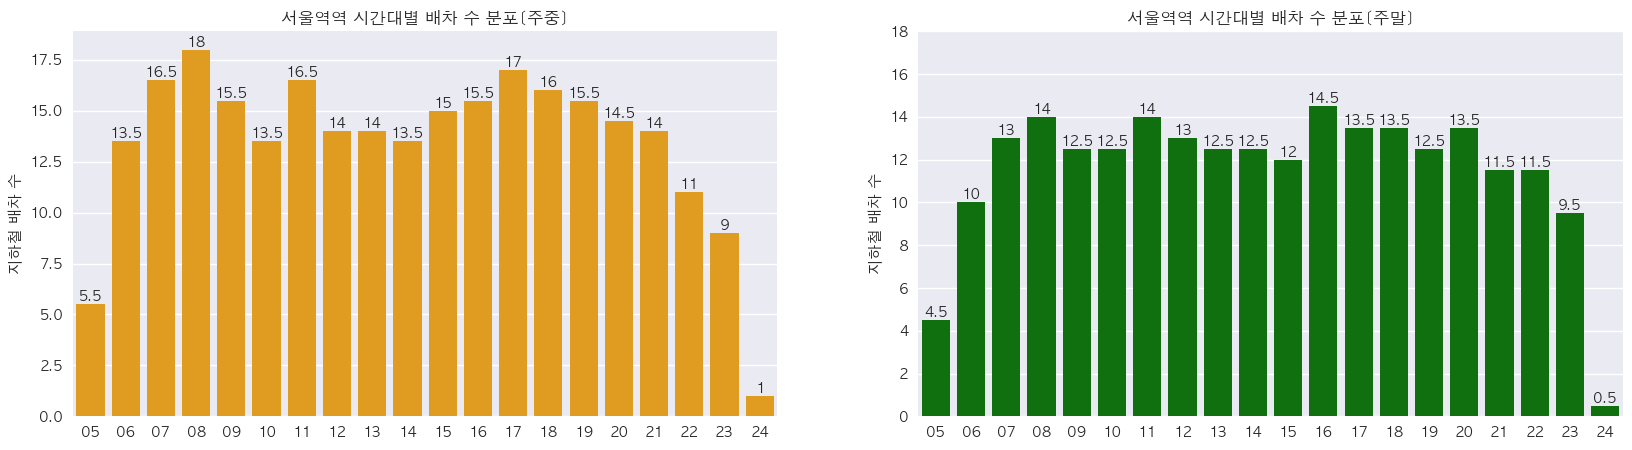

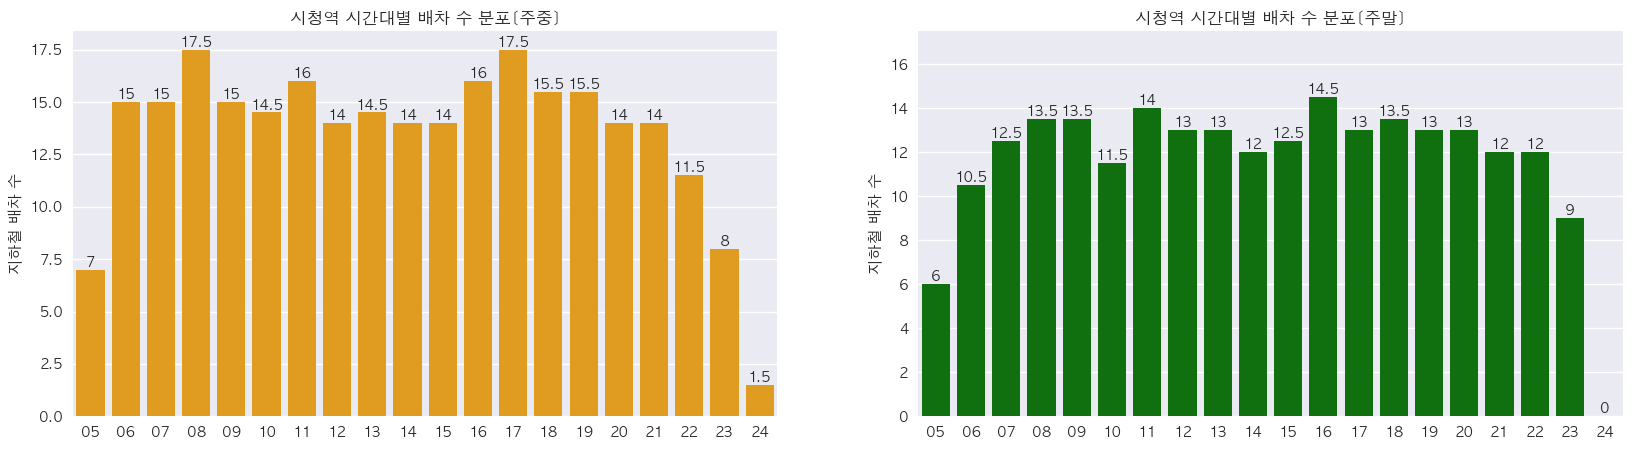

최종 병합된 테이블을 출력합니다
[2]호선 배차시간표 역사코드 개수 :51
[2]호선테이블 병합후 서비스가능한 총 역 개수 50
예시히스토그램 2개만 플랏합니다


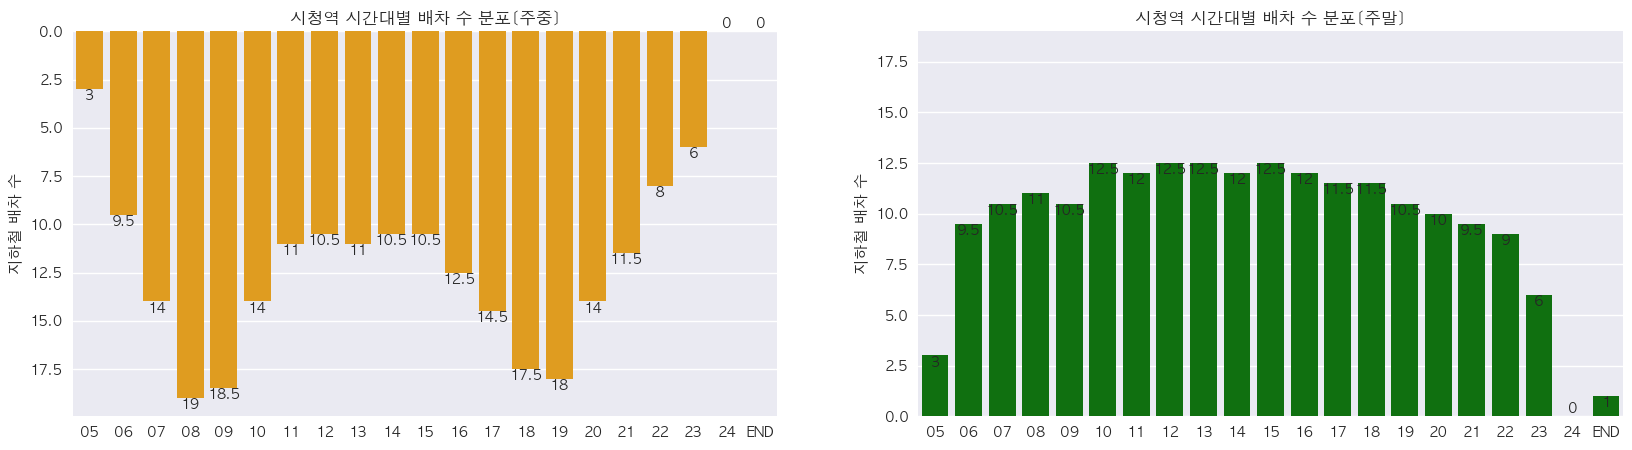

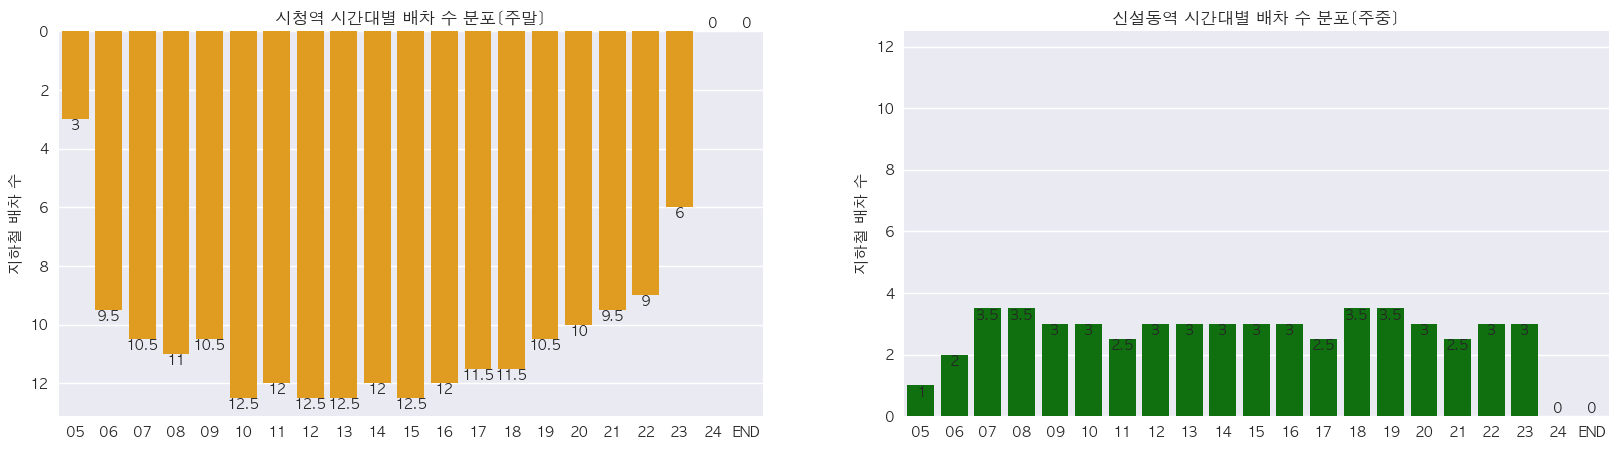

최종 병합된 테이블을 출력합니다
[3]호선 배차시간표 역사코드 개수 :44
[3]호선테이블 병합후 서비스가능한 총 역 개수 34
예시히스토그램 2개만 플랏합니다


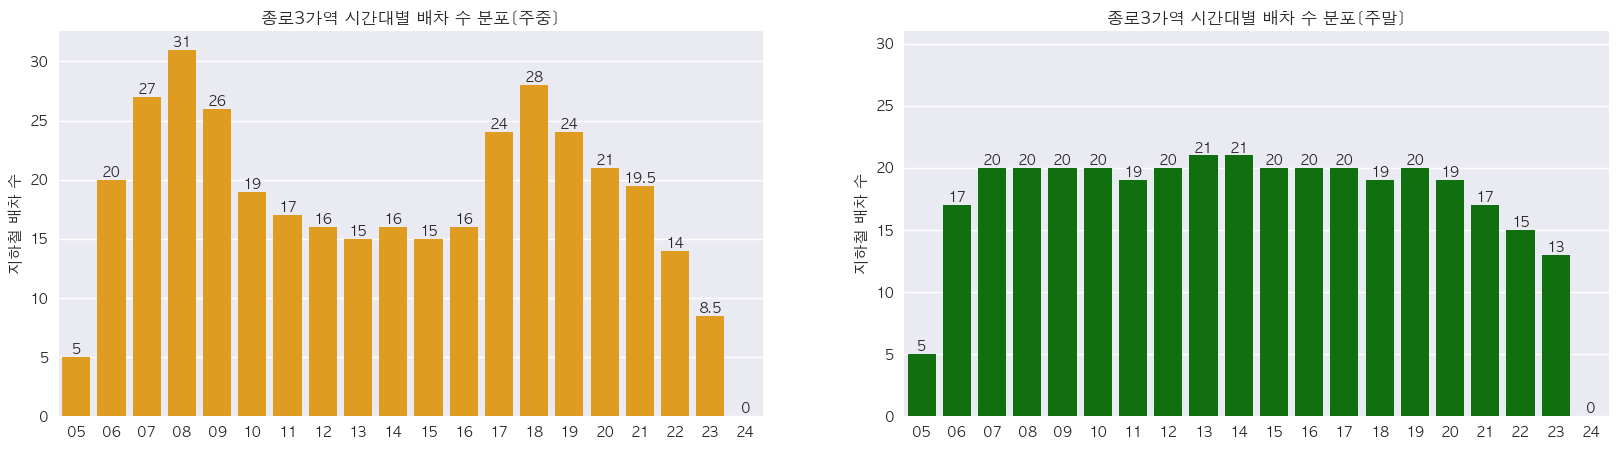

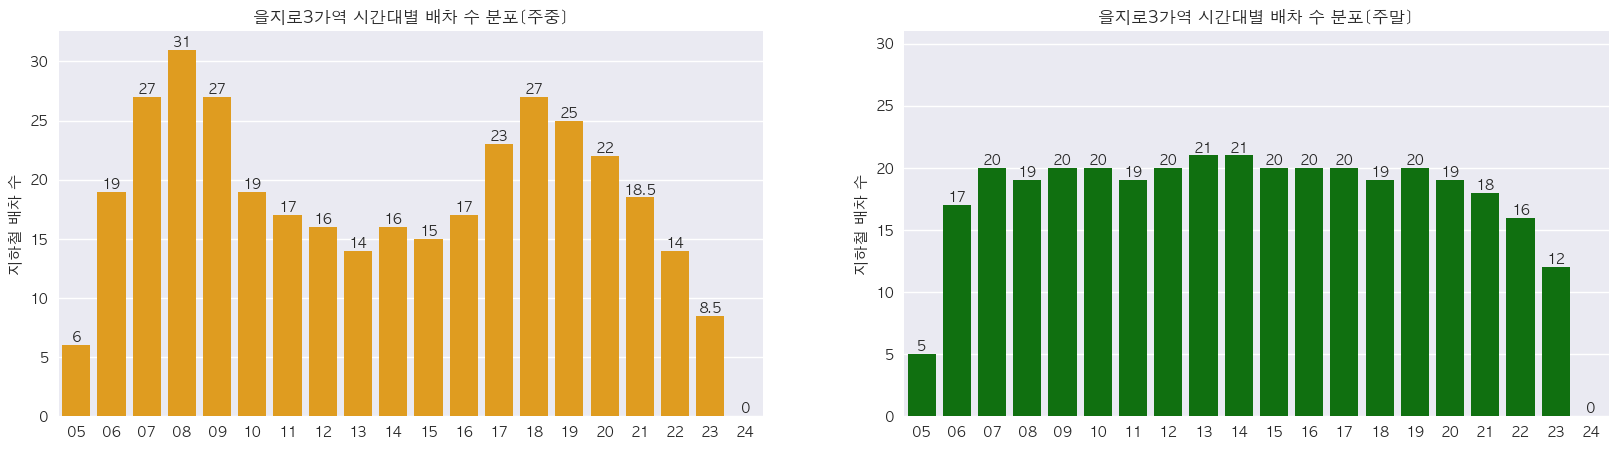

최종 병합된 테이블을 출력합니다
[4]호선 배차시간표 역사코드 개수 :48
[4]호선테이블 병합후 서비스가능한 총 역 개수 26
예시히스토그램 2개만 플랏합니다


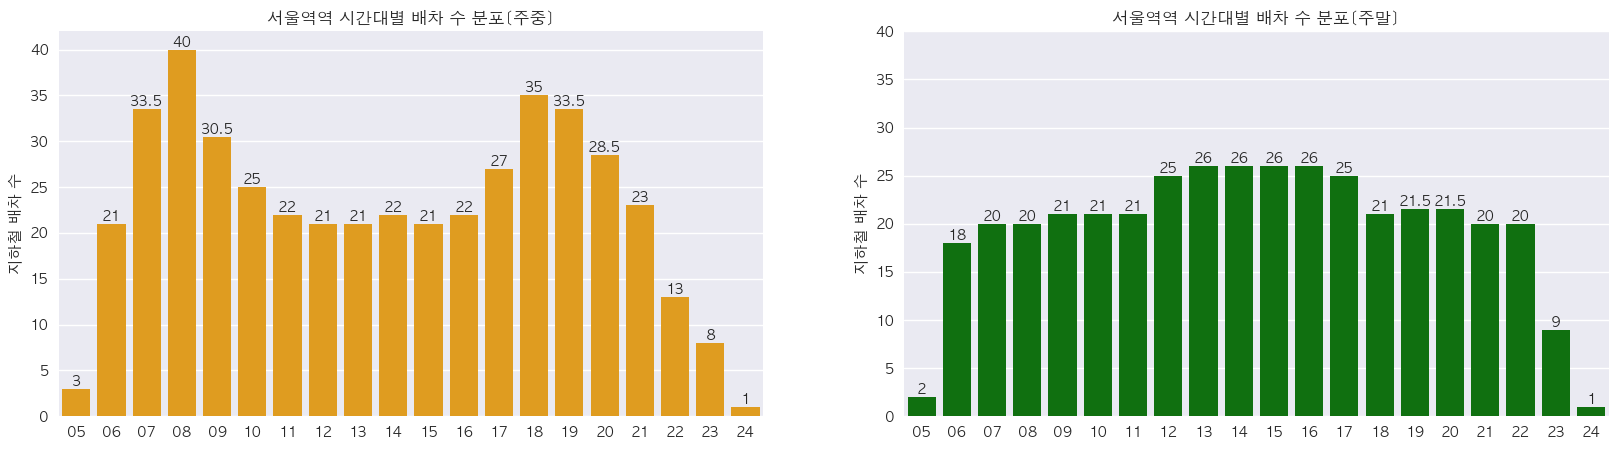

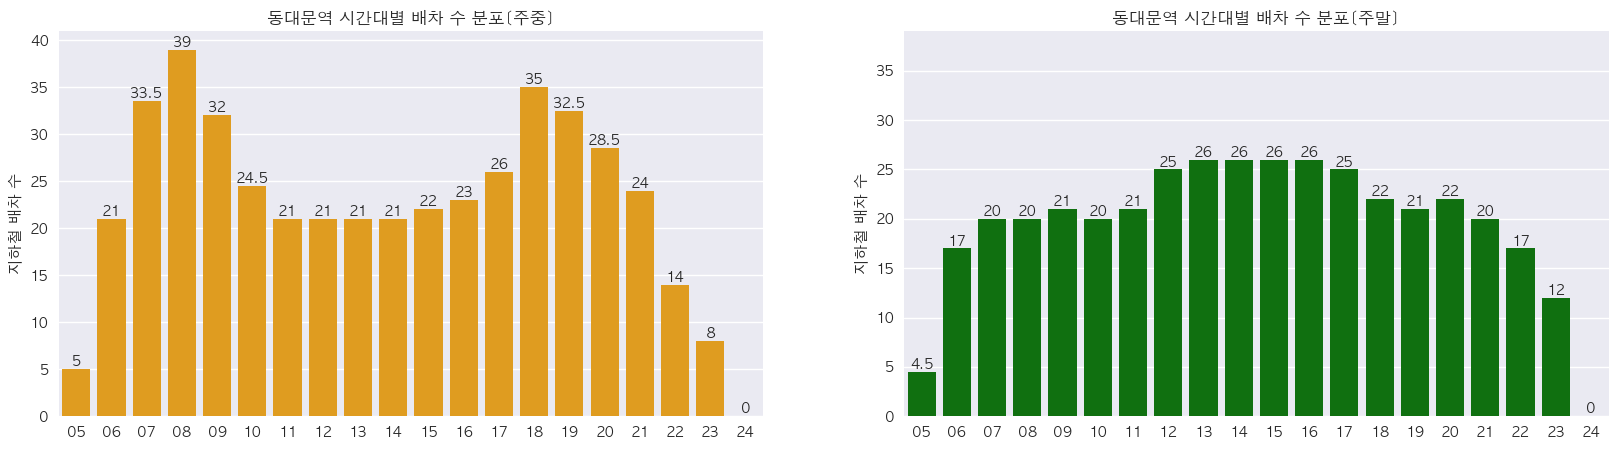

최종 병합된 테이블을 출력합니다
[5]호선 배차시간표 역사코드 개수 :56
[5]호선테이블 병합후 서비스가능한 총 역 개수 56
예시히스토그램 2개만 플랏합니다


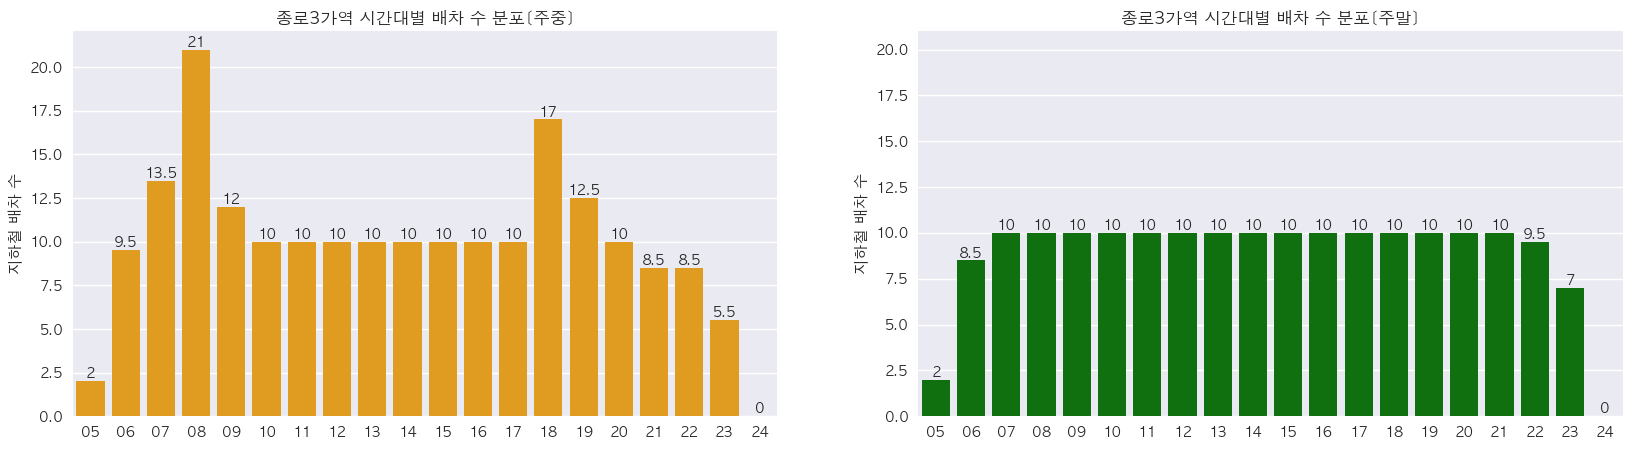

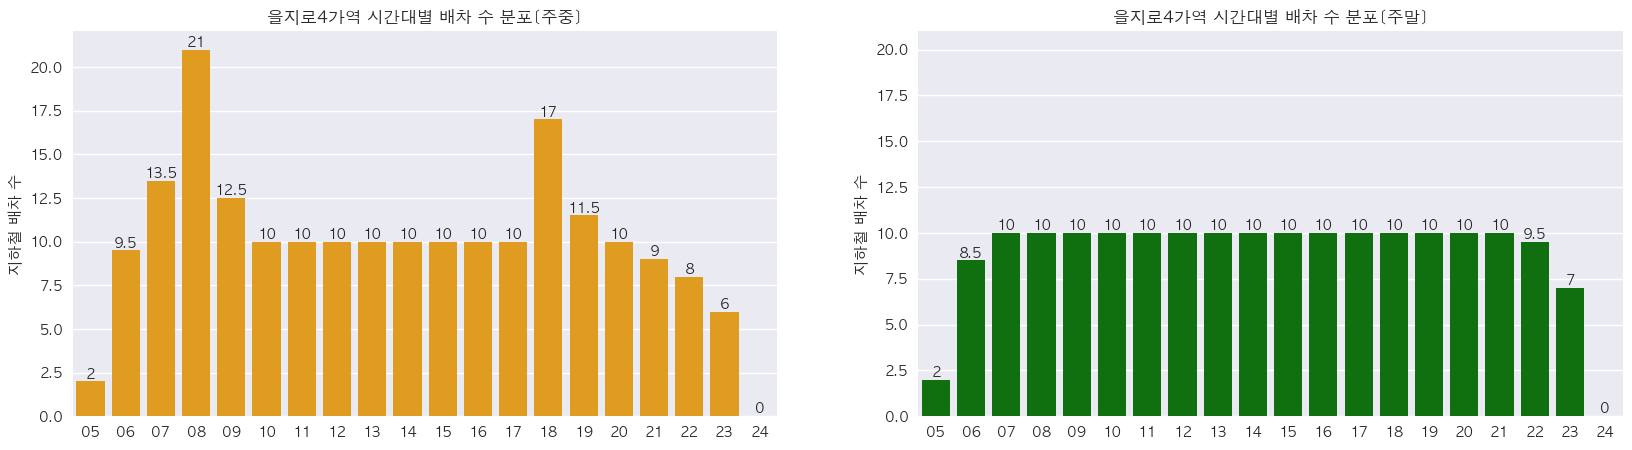

최종 병합된 테이블을 출력합니다
[6]호선 배차시간표 역사코드 개수 :39
[6]호선테이블 병합후 서비스가능한 총 역 개수 39
예시히스토그램 2개만 플랏합니다


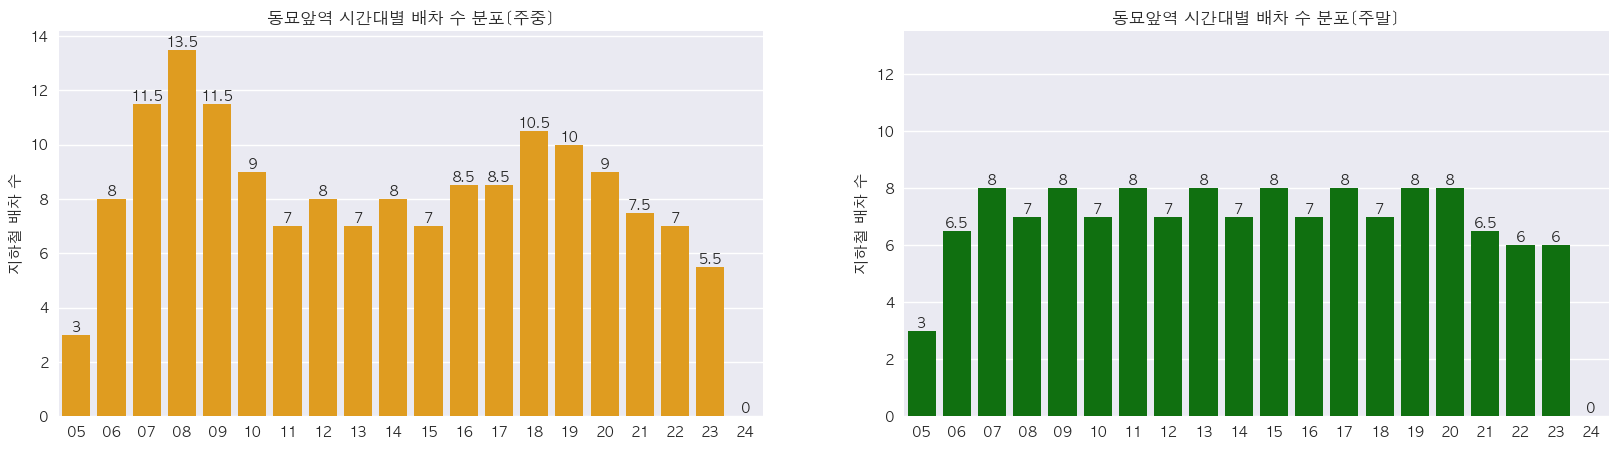

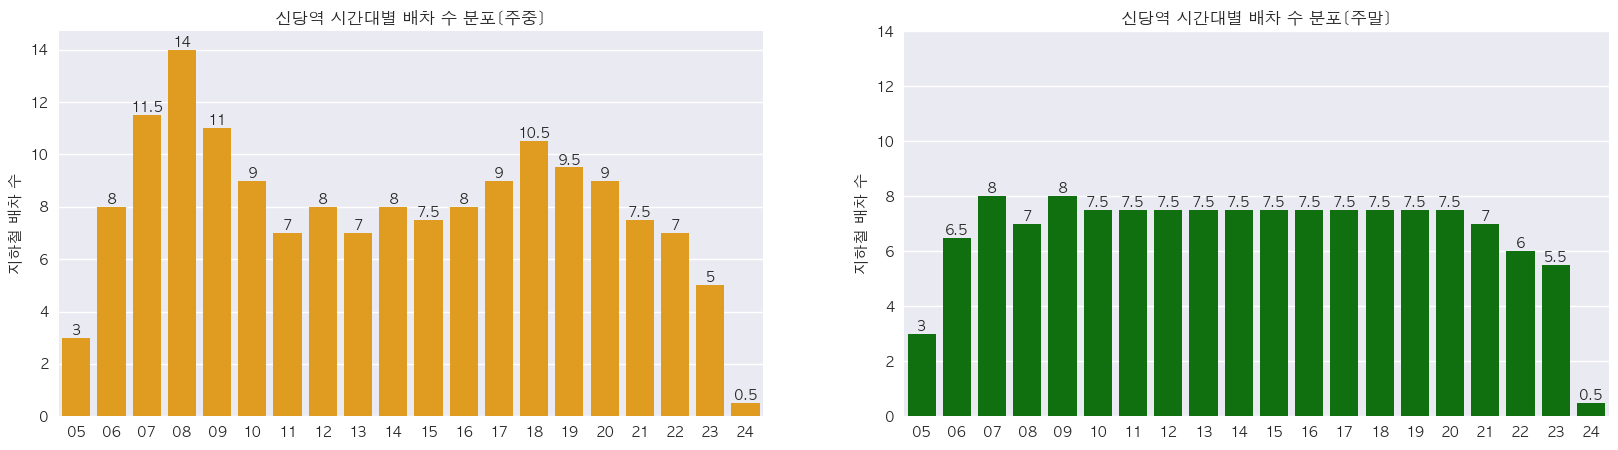

최종 병합된 테이블을 출력합니다
[7]호선 배차시간표 역사코드 개수 :53
[7]호선테이블 병합후 서비스가능한 총 역 개수 46
예시히스토그램 2개만 플랏합니다


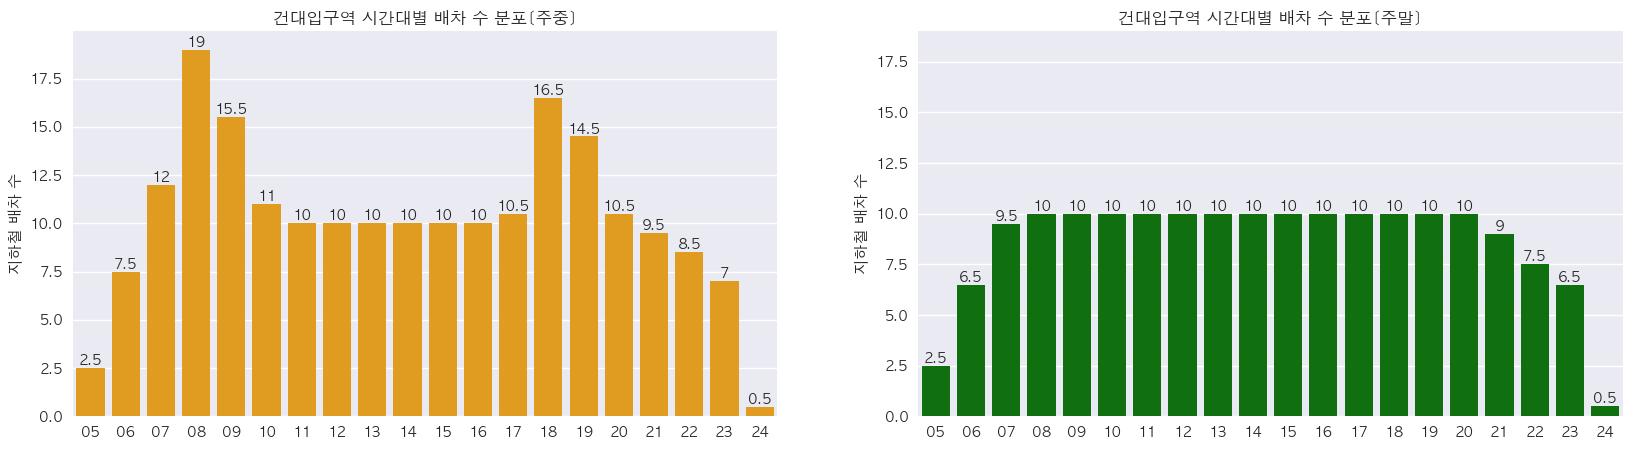

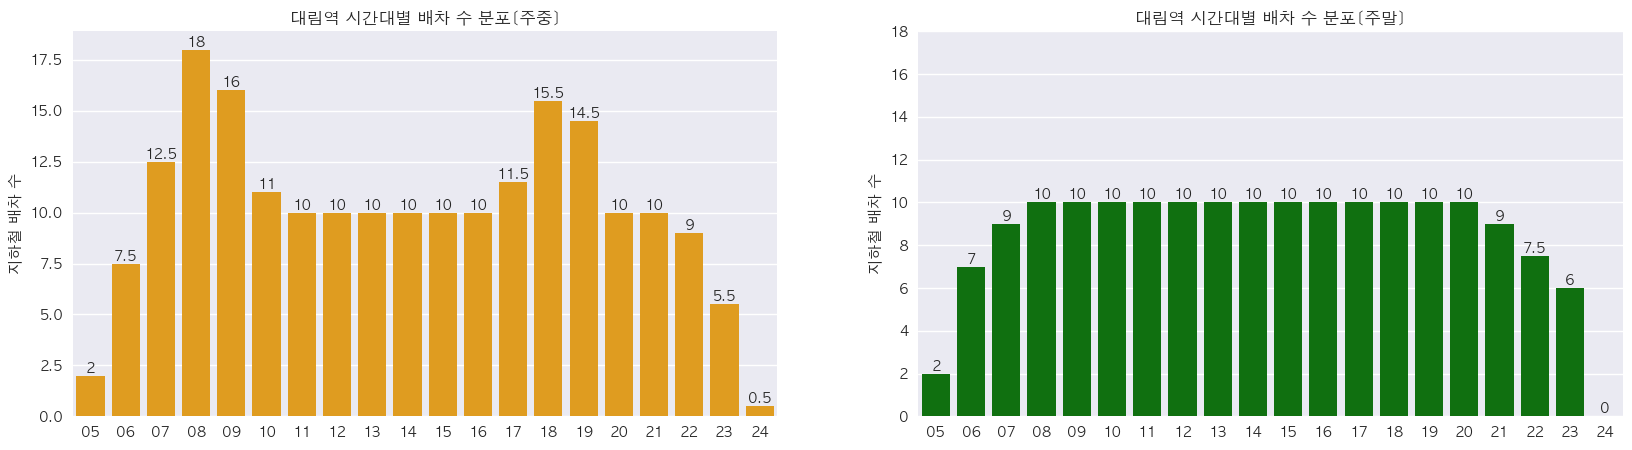

최종 병합된 테이블을 출력합니다
[8]호선 배차시간표 역사코드 개수 :17
[8]호선테이블 병합후 서비스가능한 총 역 개수 17
예시히스토그램 2개만 플랏합니다


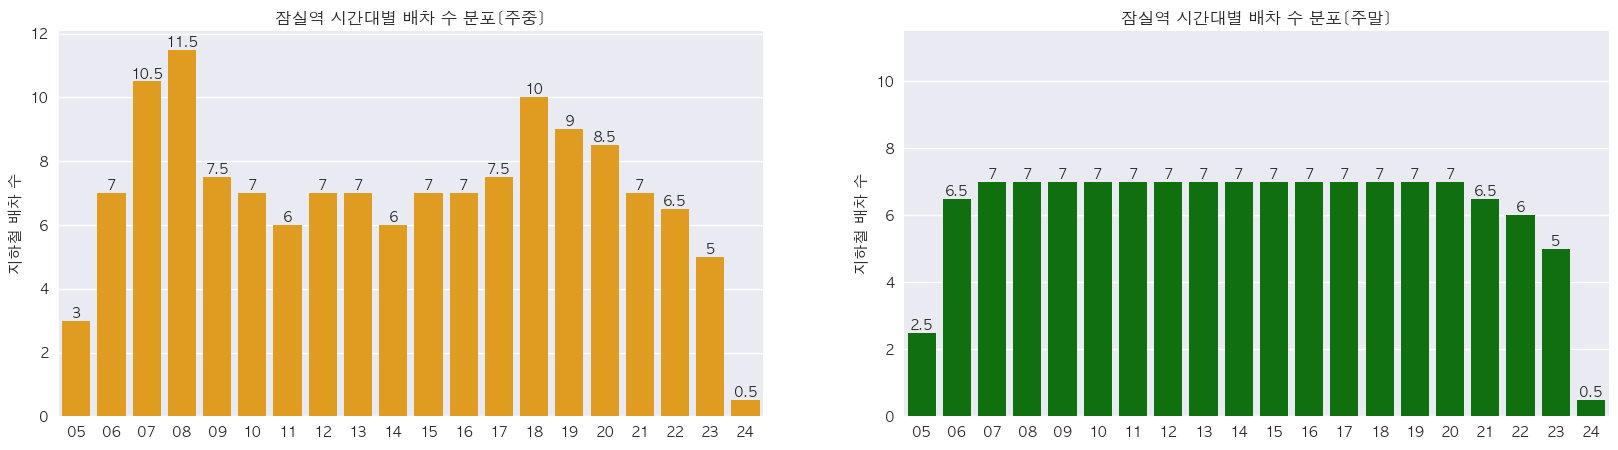

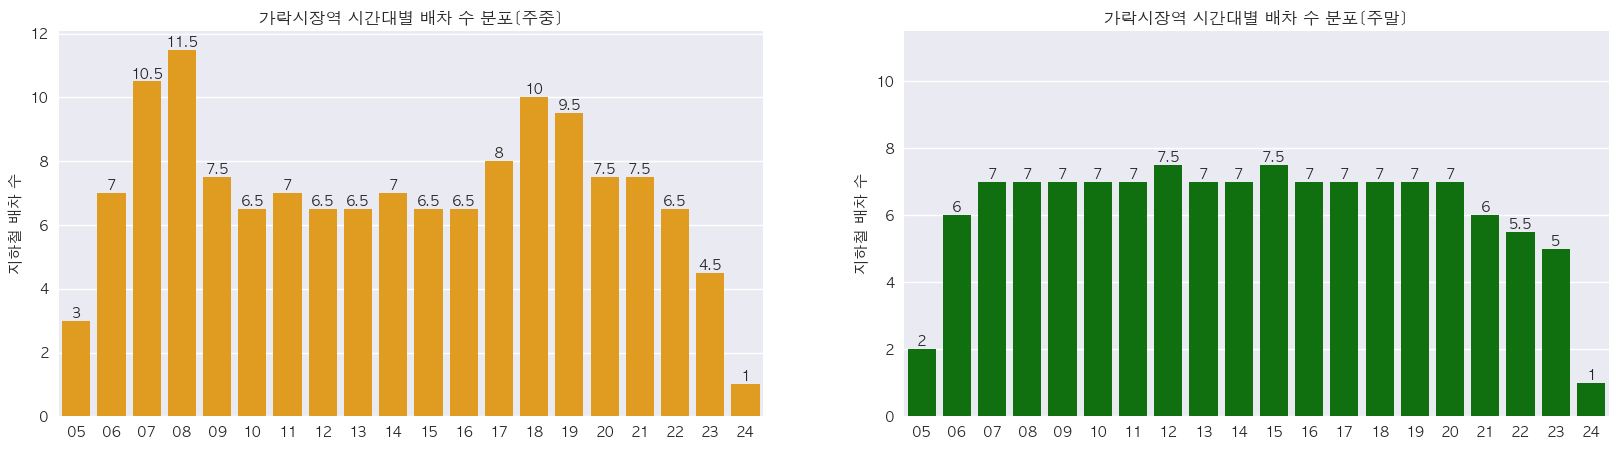

최종 병합된 테이블을 출력합니다


,역사코드,역명,호선,환승역수,주말,주중,latitude,longitude,주중주말,05,...,15,16,17,18,19,20,21,22,23,24
87,2761,부평구청,7,1,True,False,37.507434,126.721440,SAT,2.0,...,5.0,5.0,5.0,5.0,5.0,4.5,6.0,5.5,4.5,0.5
88,2753,까치울,7,1,False,True,37.506227,126.811340,DAY,2.5,...,5.0,5.0,6.0,7.5,8.0,7.5,5.5,5.5,4.5,1.0
89,2753,까치울,7,1,True,False,37.506227,126.811340,SAT,2.0,...,5.0,5.0,5.0,5.0,5.0,5.0,6.0,5.0,4.5,0.5
90,2757,부천시청,7,1,False,True,37.504656,126.764014,DAY,2.5,...,5.0,5.0,5.5,8.0,7.5,8.0,5.0,5.5,5.0,0.5
91,2757,부천시청,7,1,True,False,37.504656,126.764014,SAT,2.0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.5,6.0,3.5,1.0


In [5]:
# 7호선 배차 시간 데이터

def table_merge_subwayInfo_dispatch(subwayInfo,line_배치):
    print(f"{line_배치['호선'].unique() }호선 배차시간표 역사코드 개수 :{len(line_배치['역사코드'].unique())}")
    test_merged_interval= pd.merge(subwayInfo,line_배치, on= ['역사코드','호선'])
    print(f"{line_배치['호선'].unique()}호선테이블 병합후 서비스가능한 총 역 개수",len(test_merged_interval['역사코드'].unique()))
    ## 주중 주말  카테고리를 0,1 로 바꾸어줌 주말일경우 1 주중일경우 0  ->onehot encoding 
    test_mi = test_merged_interval.copy()
    # test_mi.rename({'주중주말':'주말'}, axis=1,inplace=True)
    test_mi_week_dummies = pd.get_dummies(test_mi['주중주말'])


    test_mi_week_dummies.head()
    test_ = pd.concat([test_mi,test_mi_week_dummies], axis=1)
    # 주말 칼럼 삭제 , day -> 주중, sat -> 주말 로 변경 
    # test_.drop('주말', axis=1, inplace=True)
    # for idx, col in enumerate(list(test_.columns)):
    #     print(idx, col)
    # 인덱스 2의 값을 인덱스 4로 이동

    test_ =Service.reorder_columns(test_,'SAT',4)
    test_ =Service.reorder_columns(test_,'DAY',5)
    ## 배차시간 칼럼 이름 변경 
    # t1=pd.concat([test_.columns[:8].to_series(),test_.columns[8:].to_series()+'시배차'])
    # test_.columns =t1
    test_.rename(
        {
            'SAT':'주말',
            'DAY':'주중'
        }, axis=1, inplace=True
    )
    print("예시히스토그램 2개만 플랏합니다")
    for i in range(0,len(test_[:4]),2): ## 예시로 2개
        Service.stationDispatchBarplot(test_,i, title_columnName='역명',startColNum=9)
    print("최종 병합된 테이블을 출력합니다")
    return test_
line_배치_dict ={}
for i in range(1,9):
    line_배치_dict[f'{i}호선'] = pd.read_csv(f'../Data/지하철배차시간데이터/{i}호선배차.csv')
    line_배치_dict[f'{i}호선'] = table_merge_subwayInfo_dispatch(subwayInfo,line_배치_dict[f'{i}호선'])
line_배치_dict['7호선'].tail()



> 주중에는 출퇴근 시간인 7시부터 9시까지, 6시부터 8시 까지 배차수가 많다. 11시부터 5시까지는 20대로 일정.       
> 7시 전에는 배차수가 줄어든다.     
> 지하철 배차 분포를 분석하기위해 각 시간대별 배차수 평균과 standard deviation 같은 통계치를 넣은 그래프를 넣고싶다. error bar  

---
#### 전체 학습데이터 생성
- 서울교통공사 역별 일별 시간대별 승하차 인원 정보 2022도 데이터 와 지하철 역정보 테이블을 merge



In [6]:
# Data loading 
subway = pd.read_csv("../Data/교통공사데이터/서울교통공사_역별 일별 시간대별 승하차인원 정보_20221231.csv", encoding='euc-kr')
subway.head()

,연번,수송일자,호선,고유역번호(외부역코드),역명,승하차구분,06시이전,06-07시간대,07-08시간대,08-09시간대,...,15-16시간대,16-17시간대,17-18시간대,18-19시간대,19-20시간대,20-21시간대,21-22시간대,22-23시간대,23-24시간대,24시이후
0,1,2022-01-01,1,150,서울역,승차,120,137,211,439,...,1566,1686,1591,1358,1062,899,1327,814,234,NaN
1,2,2022-01-01,1,150,서울역,하차,113,560,617,910,...,1329,1251,1126,884,764,654,728,416,131,NaN
2,3,2022-01-01,1,151,시청,승차,38,66,101,139,...,474,550,672,528,420,434,491,232,38,NaN
3,4,2022-01-01,1,151,시청,하차,31,195,224,380,...,408,377,354,213,131,98,137,61,24,NaN
4,5,2022-01-01,1,152,종각,승차,44,71,86,158,...,889,964,1024,803,855,1099,1209,255,62,NaN


In [7]:
subway_test= Service.dataInfoProcessing(subway,replace_Nan=True,PrintOutColnumber=10)
mlTable = subway_test
mlTable.head()


1. Data row/colum numbers : 199080/26

2. null ceck 결과 총 82346개의 null 이 있습니다!
   => 25번째.[24시이후]컬럼 :  null 82346 개,	 not null 116734 개

3. Column  Information (중복체크)
	idx.columName |				 |Colum Info(dtype)|** 
	 ----------------------------------------------------------------
	0.[연번(int64)]: 			199080/199080 [uniq/raw]
	1.[수송일자(object)]: 			365/199080 [uniq/raw]
	2.[호선(int64)]: 			8/199080 [uniq/raw]
	3.[고유역번호(외부역코드)(object)]: 		558/199080 [uniq/raw]
	4.[역명(object)]: 			244/199080 [uniq/raw]
	5.[승하차구분(object)]: 			2/199080 [uniq/raw]
	6.[06시이전(int64)]: 			1596/199080 [uniq/raw]
	7.[06-07시간대(int64)]: 		2515/199080 [uniq/raw]
	8.[07-08시간대(int64)]: 		6520/199080 [uniq/raw]
	9.[08-09시간대(int64)]: 		10884/199080 [uniq/raw]
	 ...etc (추가로 16개의 칼럼이 있습니다 )


,연번,수송일자,호선,고유역번호(외부역코드),역명,승하차구분,06시이전,06-07시간대,07-08시간대,08-09시간대,...,15-16시간대,16-17시간대,17-18시간대,18-19시간대,19-20시간대,20-21시간대,21-22시간대,22-23시간대,23-24시간대,24시이후
0,1,2022-01-01,1,150,서울역,승차,120,137,211,439,...,1566,1686,1591,1358,1062,899,1327,814,234,0.0
1,2,2022-01-01,1,150,서울역,하차,113,560,617,910,...,1329,1251,1126,884,764,654,728,416,131,0.0
2,3,2022-01-01,1,151,시청,승차,38,66,101,139,...,474,550,672,528,420,434,491,232,38,0.0
3,4,2022-01-01,1,151,시청,하차,31,195,224,380,...,408,377,354,213,131,98,137,61,24,0.0
4,5,2022-01-01,1,152,종각,승차,44,71,86,158,...,889,964,1024,803,855,1099,1209,255,62,0.0


--- 
### 칼럼 이름 정제 

In [8]:
mlTable.columns
mlTable.rename({
    "고유역번호(외부역코드)":"역사코드",
    # '06시이전':'05',
    # '06-07시간대':'06',
    # '07-08시간대':'07',
    # '08-09시간대':'08',
    # '09-10시간대':'09',
    # '10-11시간대':'10',
    # '11-12시간대':'11',
    # '12-13시간대':'12',
    # '13-14시간대':'13',
    # '14-15시간대':'14',
    # '15-16시간대':'15',
    # '16-17시간대':'16',
    # '17-18시간대':'17',
    # '18-19시간대':'18',
    # '19-20시간대':'19',
    # '20-21시간대':'20',
    # '21-22시간대':'21',
    # '22-23시간대':'22',
    # '23-24시간대':'23',
    # '24시이후':'24', 
    },inplace =True, axis = 1)



---
#### 수송일자를 기준으로 날짜 변수 feature 화 

In [9]:

mlTable= Service.dayToIntConvert(mlTable, "수송일자")
mlTable = Service.reorder_columns(mlTable,col_name="요일",target_idx=4)
# mlTable.drop('연번', inplace=True, axis=1)
mlTable.head()

,연번,수송일자,호선,역사코드,요일,역명,승하차구분,06시이전,06-07시간대,07-08시간대,...,15-16시간대,16-17시간대,17-18시간대,18-19시간대,19-20시간대,20-21시간대,21-22시간대,22-23시간대,23-24시간대,24시이후
0,1,2022-01-01,1,150,6,서울역,승차,120,137,211,...,1566,1686,1591,1358,1062,899,1327,814,234,0.0
1,2,2022-01-01,1,150,6,서울역,하차,113,560,617,...,1329,1251,1126,884,764,654,728,416,131,0.0
2,3,2022-01-01,1,151,6,시청,승차,38,66,101,...,474,550,672,528,420,434,491,232,38,0.0
3,4,2022-01-01,1,151,6,시청,하차,31,195,224,...,408,377,354,213,131,98,137,61,24,0.0
4,5,2022-01-01,1,152,6,종각,승차,44,71,86,...,889,964,1024,803,855,1099,1209,255,62,0.0


In [10]:
mlTable= Service.date_Divid_Add_YMW_cols(mlTable,'수송일자')
mlTable.head()

,연번,수송일자,호선,역사코드,요일,역명,승하차구분,06시이전,06-07시간대,07-08시간대,...,18-19시간대,19-20시간대,20-21시간대,21-22시간대,22-23시간대,23-24시간대,24시이후,년도,월,주차
0,1,2022-01-01,1,150,6,서울역,승차,120,137,211,...,1358,1062,899,1327,814,234,0.0,2021,1,52
1,2,2022-01-01,1,150,6,서울역,하차,113,560,617,...,884,764,654,728,416,131,0.0,2021,1,52
2,3,2022-01-01,1,151,6,시청,승차,38,66,101,...,528,420,434,491,232,38,0.0,2021,1,52
3,4,2022-01-01,1,151,6,시청,하차,31,195,224,...,213,131,98,137,61,24,0.0,2021,1,52
4,5,2022-01-01,1,152,6,종각,승차,44,71,86,...,803,855,1099,1209,255,62,0.0,2021,1,52


In [11]:

## 공휴일 데이터 추가 
mlTable= Service.holidaysToIntConvert(mlTable,DateColName='수송일자')
mlTable.head()

,연번,수송일자,호선,역사코드,요일,역명,승하차구분,06시이전,06-07시간대,07-08시간대,...,19-20시간대,20-21시간대,21-22시간대,22-23시간대,23-24시간대,24시이후,년도,월,주차,공휴일
0,1,2022-01-01,1,150,6,서울역,승차,120,137,211,...,1062,899,1327,814,234,0.0,2021,1,52,0
1,2,2022-01-01,1,150,6,서울역,하차,113,560,617,...,764,654,728,416,131,0.0,2021,1,52,0
2,3,2022-01-01,1,151,6,시청,승차,38,66,101,...,420,434,491,232,38,0.0,2021,1,52,0
3,4,2022-01-01,1,151,6,시청,하차,31,195,224,...,131,98,137,61,24,0.0,2021,1,52,0
4,5,2022-01-01,1,152,6,종각,승차,44,71,86,...,855,1099,1209,255,62,0.0,2021,1,52,0


In [12]:
## 수송일자 , 연번 삭제 시간관련데이터 앞으로 이동 
for idx, col in enumerate(["년도","월","주차","공휴일"]):
    mlTable=Service.reorder_columns(col_name=col,df=mlTable,target_idx=idx)
# mlTable.drop('연번',axis=1, inplace=True)
# mlTable.drop('수송일자',axis=1, inplace=True)
mlTable.head()


,년도,월,주차,공휴일,연번,수송일자,호선,역사코드,요일,역명,...,15-16시간대,16-17시간대,17-18시간대,18-19시간대,19-20시간대,20-21시간대,21-22시간대,22-23시간대,23-24시간대,24시이후
0,2021,1,52,0,1,2022-01-01,1,150,6,서울역,...,1566,1686,1591,1358,1062,899,1327,814,234,0.0
1,2021,1,52,0,2,2022-01-01,1,150,6,서울역,...,1329,1251,1126,884,764,654,728,416,131,0.0
2,2021,1,52,0,3,2022-01-01,1,151,6,시청,...,474,550,672,528,420,434,491,232,38,0.0
3,2021,1,52,0,4,2022-01-01,1,151,6,시청,...,408,377,354,213,131,98,137,61,24,0.0
4,2021,1,52,0,5,2022-01-01,1,152,6,종각,...,889,964,1024,803,855,1099,1209,255,62,0.0


In [13]:
## 요일 데이터를 통해 주중 주말 여부를 판단하고 칼럼에 추가 
mlTable['주중주말'] = ['SAT' if day in [5, 6] else 'DAY' for day in mlTable['요일']]
mlTable.head()

,년도,월,주차,공휴일,연번,수송일자,호선,역사코드,요일,역명,...,16-17시간대,17-18시간대,18-19시간대,19-20시간대,20-21시간대,21-22시간대,22-23시간대,23-24시간대,24시이후,주중주말
0,2021,1,52,0,1,2022-01-01,1,150,6,서울역,...,1686,1591,1358,1062,899,1327,814,234,0.0,SAT
1,2021,1,52,0,2,2022-01-01,1,150,6,서울역,...,1251,1126,884,764,654,728,416,131,0.0,SAT
2,2021,1,52,0,3,2022-01-01,1,151,6,시청,...,550,672,528,420,434,491,232,38,0.0,SAT
3,2021,1,52,0,4,2022-01-01,1,151,6,시청,...,377,354,213,131,98,137,61,24,0.0,SAT
4,2021,1,52,0,5,2022-01-01,1,152,6,종각,...,964,1024,803,855,1099,1209,255,62,0.0,SAT


In [14]:

mlTable_승차 = mlTable[mlTable['승하차구분']=='승차']
mlTable_하차 = mlTable[mlTable['승하차구분']=='하차']
mlTable_승차.head()

,년도,월,주차,공휴일,연번,수송일자,호선,역사코드,요일,역명,...,16-17시간대,17-18시간대,18-19시간대,19-20시간대,20-21시간대,21-22시간대,22-23시간대,23-24시간대,24시이후,주중주말
0,2021,1,52,0,1,2022-01-01,1,150,6,서울역,...,1686,1591,1358,1062,899,1327,814,234,0.0,SAT
2,2021,1,52,0,3,2022-01-01,1,151,6,시청,...,550,672,528,420,434,491,232,38,0.0,SAT
4,2021,1,52,0,5,2022-01-01,1,152,6,종각,...,964,1024,803,855,1099,1209,255,62,0.0,SAT
6,2021,1,52,0,7,2022-01-01,1,153,6,종로3가,...,1178,1028,861,705,871,1160,324,69,0.0,SAT
8,2021,1,52,0,9,2022-01-01,1,154,6,종로5가,...,938,818,620,510,479,477,107,22,0.0,SAT


---
### 현재 7호선만 배차 테이블이 있다. 
mlTable 을 7호선 만 추출 후 merge

In [15]:
def line_test(line,mlTable,line_배치_dict):

    mlt= mlTable[mlTable['호선']==line]

    # line7_배치_dict[f'{line}호선'].drop('역명',axis=1,inplace=True)
    # line7_배치_dict[f'{line}호선'].drop('승하차구분',axis=1,inplace=True)
    mlt7_stInfo_merged= pd.merge(line_배치_dict[f'{line}호선'],mlt,on = ['역사코드','주중주말','호선','역명'])
    # 배차 테이블 check
    mlt7_stInfo_merged.rename({
    "고유역번호(외부역코드)":"역사코드",
    '06시이전':'05시인원',
    '06-07시간대':'06시인원',
    '07-08시간대':'07시인원',
    '08-09시간대':'08시인원',
    '09-10시간대':'09시인원',
    '10-11시간대':'10시인원',
    '11-12시간대':'11시인원',
    '12-13시간대':'12시인원',
    '13-14시간대':'13시인원',
    '14-15시간대':'14시인원',
    '15-16시간대':'15시인원',
    '16-17시간대':'16시인원',
    '17-18시간대':'17시인원',
    '18-19시간대':'18시인원',
    '19-20시간대':'19시인원',
    '20-21시간대':'20시인원',
    '21-22시간대':'21시인원',
    '22-23시간대':'22시인원',
    '23-24시간대':'23시인원',
    '24시이후':'24시인원', 
    '05':'05배차',
    '06':'06배차',
    '07':'07배차',
    '08':'08배차',
    '09':'09배차',
    '10':'10배차',
    '11':'11배차',
    '12':'12배차',
    '13':'13배차',
    '14':'14배차',
    '15':'15배차',
    '16':'16배차',
    '17':'17배차',
    '18':'18배차',
    '19':'19배차',
    '20':'20배차',
    '21':'21배차',
    '22':'22배차',
    '23':'23배차', 
    '24':'24배차',
    },inplace =True, axis = 1)
    # return mlt7_stInfo_merged
    colnames_arry =[ '년도', '월', '주차', '공휴일', '연번', '수송일자', '호선', '요일', '역명', '승하차구분']
    for idx, col in enumerate(colnames_arry):
        mlt7_stInfo_merged=Service.reorder_columns(mlt7_stInfo_merged, col_name=col,target_idx= idx)
    print(" 머신러닝을 위해 필요없는 테이블을 버립니다. 주중주말, 수송일자, 년도 는 삭제")
    result=mlt7_stInfo_merged
    result.drop('주중주말', axis=1, inplace=True)
    result.drop('수송일자', axis=1, inplace=True)
    result.drop('년도', axis=1, inplace=True)
    print(result.columns)
    print(" 승하차를 두개로 나누어 출력합니다")
    mlTable_승차 = result[result['승하차구분']=='승차']
    mlTable_하차 = result[result['승하차구분']=='하차']
    input_column=['월', '주차', '공휴일', '요일', '역사코드', '주중', '주말',
    'latitude', 'longitude', '05배차', '06배차', '07배차', '08배차', '09배차', '10배차',
    '11배차', '12배차', '13배차', '14배차', '15배차', '16배차', '17배차', '18배차', '19배차',
    '20배차', '21배차', '22배차', '23배차', '24배차']
    target_column=['05시인원', '06시인원', '07시인원',
    '08시인원', '09시인원', '10시인원', '11시인원', '12시인원', '13시인원', '14시인원', '15시인원',
    '16시인원', '17시인원', '18시인원', '19시인원', '20시인원', '21시인원', '22시인원', '23시인원',
    '24시인원']
    mlTable_승차_input = mlTable_승차[input_column]
    mlTable_승차_target =mlTable_승차[target_column]
    mlTable_하차_input= mlTable_하차[input_column]
    mlTable_하차_target= mlTable_하차[target_column]
    mlTable_dict ={
        'mlTable_승차':mlTable_승차,
        'mlTable_하차':mlTable_하차,
        "mlTable_승차_input":mlTable_승차_input,
        "mlTable_승차_target":mlTable_승차_target,
        "mlTable_하차_input":mlTable_하차_input,
        "mlTable_하차_target":mlTable_하차_target,
    }
    return mlTable_dict
mlTable_dict_line7=line_test(line=7,mlTable=mlTable,line_배치_dict=line_배치_dict)


 머신러닝을 위해 필요없는 테이블을 버립니다. 주중주말, 수송일자, 년도 는 삭제
Index(['월', '주차', '공휴일', '연번', '호선', '요일', '역명', '승하차구분', '역사코드', '환승역수', '주말',
       '주중', 'latitude', 'longitude', '05배차', '06배차', '07배차', '08배차', '09배차',
       '10배차', '11배차', '12배차', '13배차', '14배차', '15배차', '16배차', '17배차', '18배차',
       '19배차', '20배차', '21배차', '22배차', '23배차', '24배차', '05시인원', '06시인원',
       '07시인원', '08시인원', '09시인원', '10시인원', '11시인원', '12시인원', '13시인원', '14시인원',
       '15시인원', '16시인원', '17시인원', '18시인원', '19시인원', '20시인원', '21시인원', '22시인원',
       '23시인원', '24시인원'],
      dtype='object')
 승하차를 두개로 나누어 출력합니다


In [68]:
def MultiOutputRegressorFunc(training_table, target_table) :
    
    """
    # Description : train, target데이터에 대한 MultiOutputRegressor model
    # Date : 2024.06.05
    # Author : Shin Nara + pdg
    # Detail:
        * training_table (df): train data
        * target_table (df): target data
        * Returns: - 
    # Updata:
        2024.06.07 by pdg :머신러닝 함수 업데이트 
            * 주석 달았음. 
        2024.06.09 by pdg : 
            * 함수화 완료
    """
    import pandas as pd, numpy as np
    import matplotlib.pyplot as plt 
    from sklearn.model_selection import train_test_split
    from sklearn.multioutput import MultiOutputRegressor
    from sklearn.neighbors import KNeighborsRegressor

    train_input, test_input, train_target, test_target = \
        train_test_split(training_table,
                        target_table, 
                        test_size=0.2,
                        random_state=42)
    ## KNN regression model 
    knn_regressor = KNeighborsRegressor(n_neighbors=3)
    ## Multi Output Setting
    multi_output_regressor = MultiOutputRegressor(knn_regressor)
    multi_output_regressor.fit(train_input, train_target)
    
    score = multi_output_regressor.score(test_input, test_target)
    print(f'Model score: {score}')
    
    predictions = multi_output_regressor.predict(test_input)
    print(test_target.columns)
    # print(predictions[:5])
    print("주차     요일 시간대별 예측 :",*[f"{i}시" for i in range(5,25)], sep='\t')
    for idx,시간대별예측 in enumerate(predictions):
        주차 = test_input.to_numpy()[idx][1]
        요일 =test_input.to_numpy()[idx][3]
        실제치 = test_target.to_numpy()[idx]
        match 요일:
            case 요일 if 요일 == 0: 요일_str = '일'; 
            case 요일 if 요일 == 1: 요일_str = '월'; 
            case 요일 if 요일 == 2: 요일_str = '화'; 
            case 요일 if 요일 == 3: 요일_str = '수'; 
            case 요일 if 요일 == 4: 요일_str = '목'; 
            case 요일 if 요일 == 5: 요일_str = '금'; 
            case 요일 if 요일 == 6: 요일_str = '토'; 
            case _:print()
        print(f"{주차}주차 {요일_str}요일 시간대별 예측 :", *list(map(int,(시간대별예측))), sep='\t')
        print(f"{주차}주차 {요일_str}요일 시간대별 실제 :", *실제치, sep='\t')
        print("---"*200)

MultiOutputRegressorFunc(
    mlTable_dict_line7['mlTable_승차_input'],
    mlTable_dict_line7['mlTable_승차_target'])

Model score: 0.8027654136819574
Index(['05시인원', '06시인원', '07시인원', '08시인원', '09시인원', '10시인원', '11시인원', '12시인원',
       '13시인원', '14시인원', '15시인원', '16시인원', '17시인원', '18시인원', '19시인원', '20시인원',
       '21시인원', '22시인원', '23시인원', '24시인원'],
      dtype='object')
주차     요일 시간대별 예측 :	5시	6시	7시	8시	9시	10시	11시	12시	13시	14시	15시	16시	17시	18시	19시	20시	21시	22시	23시	24시
52주차 목요일 시간대별 예측 :	206	425	1140	1709	917	552	493	488	500	467	498	593	610	658	323	270	243	186	96	32
52주차 목요일 시간대별 실제 :	206.0	359.0	984.0	1536.0	846.0	517.0	506.0	452.0	480.0	430.0	460.0	523.0	564.0	604.0	301.0	216.0	222.0	200.0	86.0	24.0
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [17]:
Service.MultiOutputRegressorFunc(
    mlTable_dict_line7['mlTable_하차_input'],
    mlTable_dict_line7['mlTable_하차_target'])

Model score: 0.7911950676884242
52 [  40.4  174.8  290.   705.2  450.6  359.   395.6  409.2  428.2  457.4
  576.6  689.   841.6 1526.8 1057.   660.8  613.2  600.   432.2  195. ]
29 [  27.8  128.   254.   593.8  447.   355.8  345.8  374.   428.6  437.
  522.2  647.6  889.6 1739.  1263.2  701.6  591.6  549.4  324.2  113.6]
21 [  71.6  565.6 1021.8 1964.4 1174.2  689.6  575.   575.   636.8  584.6
  573.   591.8  721.6  975.2  624.2  325.8  297.   240.6  222.2    4.6]
17 [  23.   110.2  236.   519.2  348.4  281.8  319.2  345.4  356.   389.2
  480.8  573.6  815.2 1175.8 1153.6  645.4  536.8  463.4  360.6    0. ]
45 [  66.2  204.2  407.8 1127.  1257.8  920.2  989.8 1108.2 1235.  1212.4
 1229.8 1331.4 1483.4 1787.  1428.   795.   696.4  638.4  440.8  131. ]
21 [  41.   153.   357.8  721.8  389.2  344.8  346.4  346.6  355.8  426.2
  501.4  610.2  767.  1304.6  950.   539.8  486.6  467.2  308.8    0. ]
48 [  65.   442.2 1071.2 3767.6 2062.2  829.   566.6  558.8  623.8  567.8
  608.8  640.8  940

In [18]:
mlTable_승차.to_csv("../Data/FinalDataset/mlTable_승차.csv", index=None)
mlTable_하차.to_csv("../Data/FinalDataset/mlTable_하차.csv", index=None)
